# Pymaceuticals Inc.
---

### Analysis
Correlation and Regression:-
-The correlation between mouse weight and the average tumor volume is: 0.84 which states that there is a strong positive correlation between the two variables. This means that as mouse weight increases, the average tumor volume tends to increase as well and vise versa. It does not mean that mouse weight causes tumor growth, or vice versa. There may be other factors that influence tumor growth.

Quartiles, Outliers and Boxplots:-
From Quartiles, Outliers and Boxplots, it seems that there are no potential outliers for the Capomulin, Ceftamin and Ramicane regimens, as their respective Series are empty. For Infubinol, there is one potential outlier with a tumor volume of 36.321346, as indicated by the value and the index of the Series.

Bar and Pie Charts:-
The bar graph showed the Drug Regimen Capomulin has the maximum mice number i.e. 230 and Propriva has the minimum mice number i.e. 148 after removing duplicates. From pie chart, the distribution of female versus male mice is 51% male mice and 49% mice.

 

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_path=pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID" )

# Display the data table for preview
combined_path

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice.
number_of_mice=combined_path["Mouse ID"].nunique()
number_of_mice

249

In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=combined_path.loc[combined_path.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [65]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_path.loc[combined_path["Mouse ID"] == "g989"]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_dataframe = combined_path.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df = combined_path.loc[combined_path['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking the number of mice in the clean DataFrame.
no_of_mice=clean_df["Mouse ID"].nunique()
no_of_mice

248

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg('mean')
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg('median')
variance=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg('var')
standard_deviation=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg('std')
standard_error=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg('sem')

# Assemble the resulting series into a single summary DataFrame.
summary_DataFrame=pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume":median,
    "Tumor Volume Variance":variance,
    "Tumor Volume Std. Dev":standard_deviation,
    "Tumor Volume Std. Err.":standard_error
})
summary_DataFrame



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stat =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

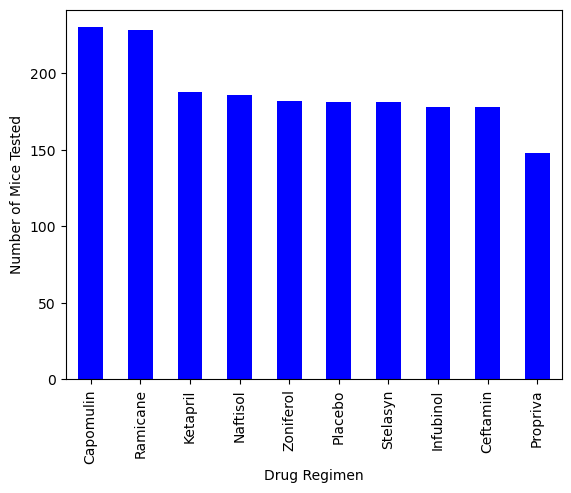

In [70]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
plot_pandas=mice_count.plot(kind="bar", color='blue').set(xlabel='Drug Regimen', ylabel='Number of Mice Tested') 

# Show the plot
plt.show()

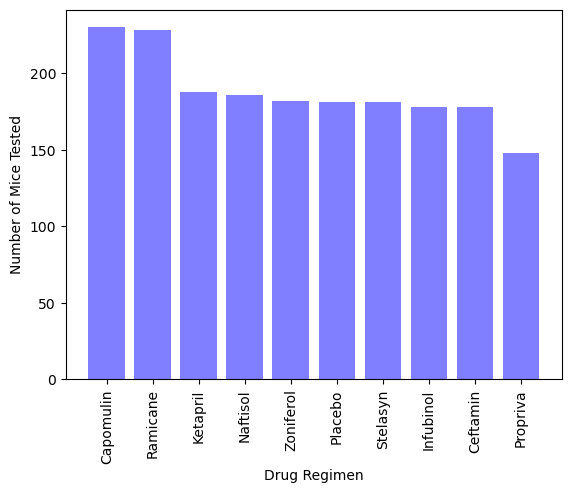

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis=np.arange(len(mice_count))
y_axis=mice_count.values
tick_locations=[x for x in x_axis]
sort=mice_count.index.values

plt.bar(x_axis,y_axis, color="blue", alpha=0.5, align="center")
plt.xticks(tick_locations, sort, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

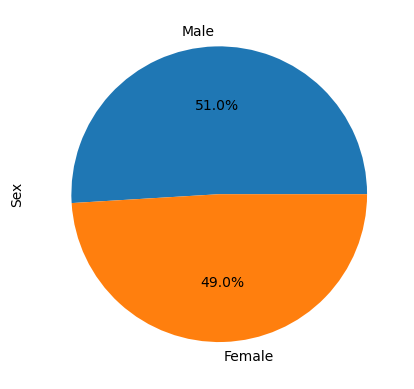

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts()
gender_data = gender.plot(kind="pie", y=gender.values, autopct="%1.1f%%").set(ylabel='Sex')

# Show the plot
plt.show()

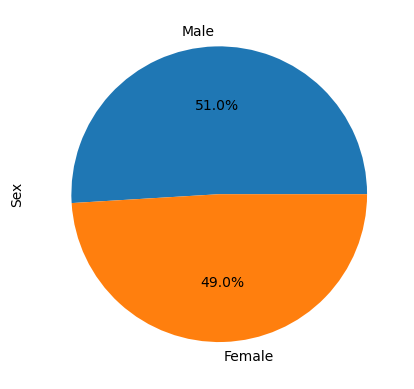

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender.values, labels=gender.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Filter Mouse ID and Drug Regimen and find the last timepoint for each mouse
max_timepoint = clean_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()

# Convert the resulting series to a dataframe
max_timepoint_df = pd.DataFrame(max_timepoint)

# Reset the index to use the Mouse ID and Drug Regimen as columns
max_timepoint_df = max_timepoint_df.reset_index()

# Merge the max timepoint dataframe with the cleaned dataframe to get the final tumor volume for each mouse on each drug
merged_df = pd.merge(max_timepoint_df, clean_df, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='inner')
merged_df


,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,10,Female,12,26,48.710661,0
244,z578,Ramicane,45,Male,11,16,30.638696,0
245,z581,Infubinol,45,Female,24,25,62.754451,3
246,z795,Naftisol,45,Female,13,29,65.741070,3


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes_for_treatment = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Determine outliers using upper and lower bounds 
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Append tumor volumes to list
    tumor_volumes_for_treatment.append(tumor_volumes)
    
    # Print the results
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


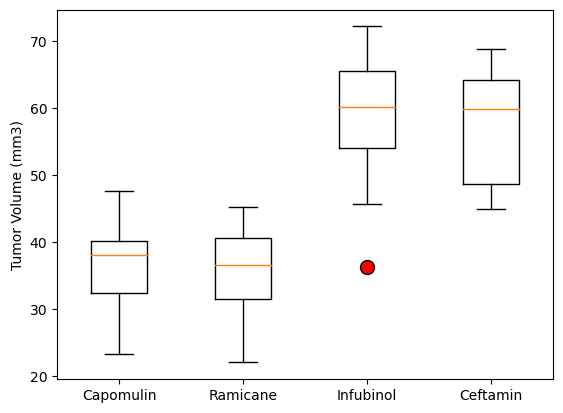

In [76]:
# Create a boxplot of the tumor volume data for each treatment
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes_for_treatment, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 10})

# Set the labels for the x-axis and y-axis
ax.set_xticklabels(treatments)
ax.set_ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()



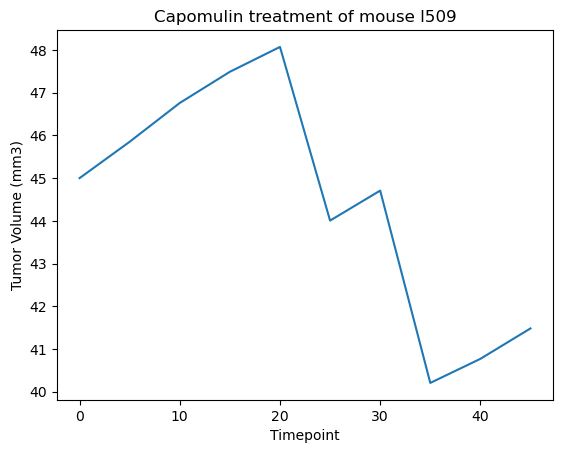

In [77]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

#Select a specific mouse to plot data for.
mouse_id = 'l509'
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')     
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.show()


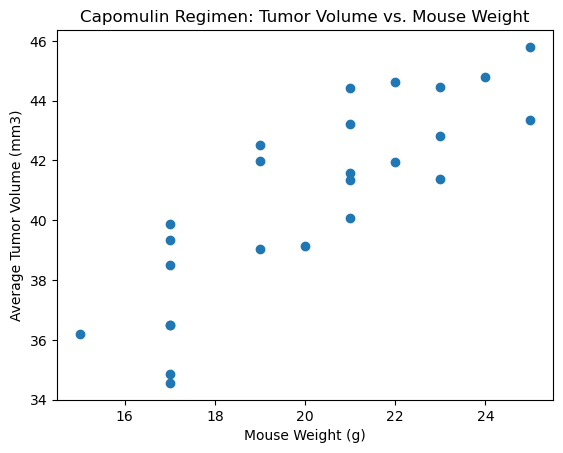

In [78]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Group the data by mouse ID and calculate the mean tumor volume for each mouse
grouped_data = capomulin_df.groupby(['Mouse ID']).mean()[['Weight (g)', 'Tumor Volume (mm3)']]

x_values = grouped_data['Weight (g)']
y_values = grouped_data['Tumor Volume (mm3)']

# Create the scatter plot
plt.scatter(weights, volumes, marker='o')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Regimen: Tumor Volume vs. Mouse Weight')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


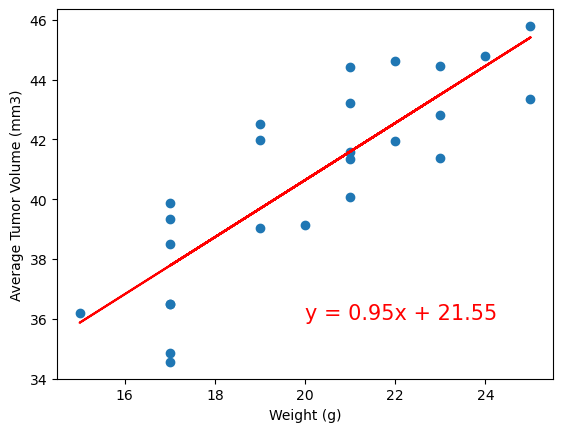

In [79]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values, y_values)

# calculate linear regression model  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create equation of line to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is: %.2f" % rvalue)
plt.show()